In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("../data/bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


seaborn --> matplotlib üzerine kurulmuş görselleştirme kütüphanesi.

In [4]:
import seaborn as sbn 
import matplotlib.pyplot as plt

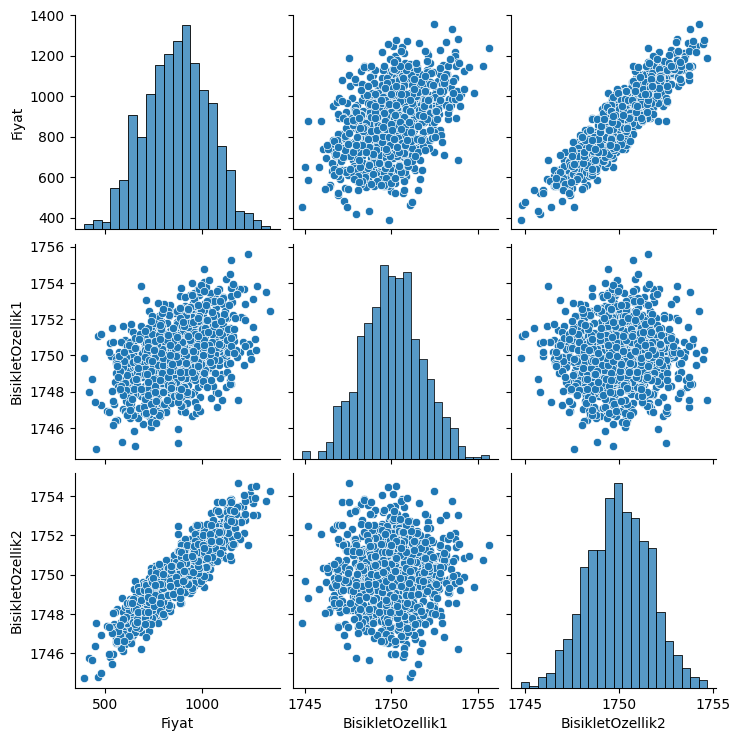

In [5]:
sbn.pairplot(dataFrame)

## Veriyi test/train olarak ikiye ayırmak

In [6]:
from sklearn.model_selection import train_test_split

### train_test_split

## y =  wx + b

## y --> label

## x --> feature

In [7]:
# .values ile pandas --> numpy olur.
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

### x_train --> x'in öğrenim için kullanılacak kısmı.

### x_test --> x'in test için kullanılacak kısmı.

### x.y --> Diziler girdi olarak giriliyor.

### test_size=0.33 --> Verinin % kaçı test için ayrılacağı giriliyor. Genelde 0.33 kullanılıyor ama yine de herhangi bir değer olabilir.

### random_state=15 --> İki kişi girdi olarak aynı sayıları yazdığı takdirde aynı algoritmaya göre seçilir.

In [8]:
x_train.shape

(670, 2)

In [9]:
x_test.shape # 330 ve 670 olarak bölünmesi test size ile alakalı.

(330, 2)

## Scaling 
---> Boyutunu değiştirmek büyültmek veya küçültmek.

Nöronlara verilecek veri küçültülür çünkü işlemler daha hızlı ve kolay olur.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train # --> Veriler kendine uygun halde 0 ile 1 arasına getirildi.

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

### Hazırlanan veriler için modele verme kısmı 

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-01-10 11:10:17.227133: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 11:10:17.547062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 11:10:17.547110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 11:10:17.581745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 11:10:17.656909: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 11:10:17.658053: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [16]:
model = Sequential()

# Kaç tane hidden layers olduğu eklenir. kaç tane lazımsa o kadar satır eklenir.
model.add(Dense(4,activation="relu")) # --> 4 nöron.Farklı sayı da seçilebilir.
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

# Çıktı katmanı eklenir.
model.add(Dense(1))

# Yapıln işlemler birleştirlir hazır hale getirilir.
model.compile(optimizer = "rmsprop", loss = "mse")

2024-01-10 11:10:19.357569: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-10 11:10:19.358061: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795847.2500
Epoch 2/250
21/21 [==============================] - 0s 870us/step - loss: 795751.7500
Epoch 3/250
21/21 [==============================] - 0s 837us/step - loss: 795654.1875
Epoch 4/250
21/21 [==============================] - 0s 865us/step - loss: 795547.1875
Epoch 5/250
21/21 [==============================] - 0s 826us/step - loss: 795432.0000
Epoch 6/250
21/21 [==============================] - 0s 818us/step - loss: 795306.8750
Epoch 7/250
21/21 [==============================] - 0s 821us/step - loss: 795170.3750
Epoch 8/250
21/21 [==============================] - 0s 799us/step - loss: 795016.1250
Epoch 9/250
21/21 [==============================] - 0s 835us/step - loss: 794839.8750
Epoch 10/250
21/21 [==============================] - 0s 798us/step - loss: 794643.1250
Epoch 11/250
21/21 [==============================] - 0s 827us/step - loss: 794422.0625
Epoch 12/250
21/21 [=======================

In [18]:
loss = model.history.history["loss"]

<Axes: >

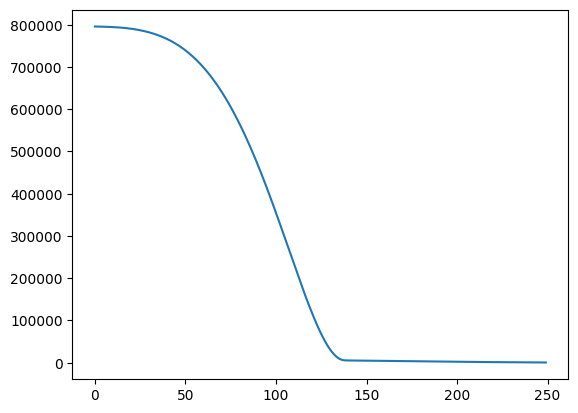

In [19]:
sbn.lineplot(x=range(len(loss)), y=loss)

In [20]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [21]:
testLoss = model.evaluate(x_train,y_train, verbose=0)

In [22]:
trainLoss 

534.8670043945312

In [23]:
testLoss

534.8670043945312

In [24]:
testTahminleri = model.predict(x_test) # x test  verilecek y test çıkacak.

11/11 [==============================] - 0s 642us/step


In [25]:
testTahminleri # Değişkenlere verilen özelliklere göre bisikletler bu fiyatlara satılabilir anlamına gelir.

array([[1057.8176 ],
       [ 662.65704],
       [ 882.91254],
       [ 893.31024],
       [ 897.006  ],
       [ 503.82666],
       [ 928.9292 ],
       [ 980.5799 ],
       [ 942.60297],
       [1004.10394],
       [ 773.88074],
       [ 921.7629 ],
       [ 940.53925],
       [1038.4734 ],
       [1099.8813 ],
       [ 710.70514],
       [1096.5928 ],
       [ 679.9488 ],
       [1119.9746 ],
       [ 891.764  ],
       [ 896.13464],
       [ 746.37494],
       [ 520.4915 ],
       [ 646.3182 ],
       [ 848.10114],
       [1071.4365 ],
       [ 738.76697],
       [ 776.14056],
       [ 876.7307 ],
       [ 788.41864],
       [ 508.66602],
       [ 802.68695],
       [ 752.1279 ],
       [ 679.2902 ],
       [ 889.84326],
       [ 852.71466],
       [1021.94086],
       [1006.41425],
       [ 855.862  ],
       [ 867.9045 ],
       [ 778.534  ],
       [1139.4441 ],
       [1074.981  ],
       [1067.1555 ],
       [ 883.81586],
       [ 638.18756],
       [1111.5789 ],
       [ 963.

In [26]:
tahminDF =  pd.DataFrame(y_test,columns=["Gerçek Y"])

In [27]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [28]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [29]:
testTahminleri

0      1057.817627
1       662.657043
2       882.912537
3       893.310242
4       897.005981
          ...     
325    1002.803711
326     804.258240
327     787.511780
328    1137.557861
329     813.014954
Length: 330, dtype: float32

In [30]:
tahminDF = pd.concat([tahminDF])

In [31]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [32]:
tahminDF = pd.concat([tahminDF,testTahminleri],axis=1)

In [33]:
tahminDF

,Gerçek Y,0
0,1081.652164,1057.817627
1,622.675990,662.657043
2,889.356810,882.912537
3,902.826733,893.310242
4,897.662404,897.005981
...,...,...
325,1028.438035,1002.803711
326,789.934950,804.258240
327,758.490486,787.511780
328,1172.871659,1137.557861


In [34]:
tahminDF.columns = ["Gerçek Y","Tahmin Y"]

In [35]:
tahminDF

,Gerçek Y,Tahmin Y
0,1081.652164,1057.817627
1,622.675990,662.657043
2,889.356810,882.912537
3,902.826733,893.310242
4,897.662404,897.005981
...,...,...
325,1028.438035,1002.803711
326,789.934950,804.258240
327,758.490486,787.511780
328,1172.871659,1137.557861


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

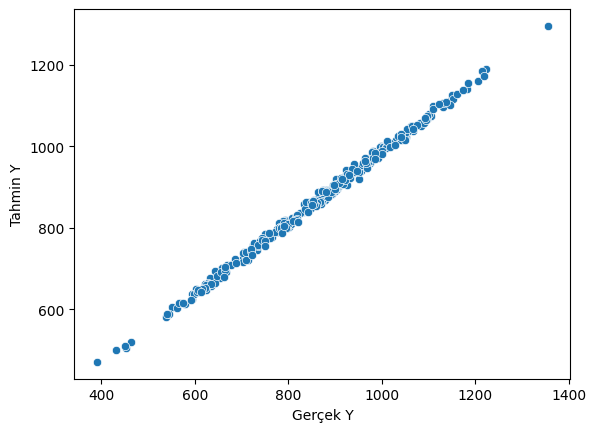

In [36]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data=tahminDF)

### Sklearn ile hataların gerçek(absolute) değeri alınabilir ve bu alınan işlemlerle gerçek hata ne kata çıkar görülebilir. Sapma için mantık yürütülebilir.

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_absolute_error(tahminDF["Gerçek Y"],tahminDF["Tahmin Y"]) # --> 42.80'lik hata.

18.130300768207857

In [39]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [40]:
yeniBisikletOzellikleri = [[1753,1751]] # Özellik verildi.

In [41]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri) # 0 ile 1 arasına atandı.

In [42]:
model.predict(yeniBisikletOzellikleri) # Modele tahmin yaptırıldı.

1/1 [==============================] - 0s 13ms/step


array([[1066.3008]], dtype=float32)

## Hazırlanan modelin kaydedilmesi

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save("../model/bisiklet_modeli.keras") # Kaydetme.

In [45]:
sonradnCagirilanModel = load_model("../model/bisiklet_modeli.keras") # Çağırma.

In [46]:
model.predict(yeniBisikletOzellikleri) # Deneme.

1/1 [==============================] - 0s 14ms/step


array([[1066.3008]], dtype=float32)